In [1]:
#!pip install qiskit qiskit-aer pylatexenc 

## Building a quantum circuit

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

In [3]:
qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)

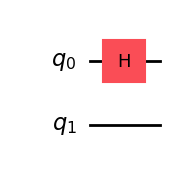

In [4]:
q0,q1 = qubits
circuit.h(q0)

circuit.draw("mpl")

## Peeking at the intermediate states

In [5]:
from qiskit_aer import StatevectorSimulator
from qiskit import transpile

from qiskit.visualization import plot_bloch_multivector

In [6]:
backend = StatevectorSimulator()
trans_sv = transpile(circuit, backend)

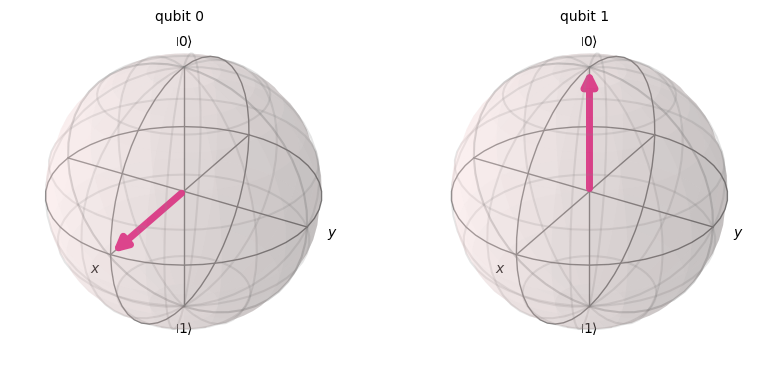

In [7]:
sv = backend.run(trans_sv).result().get_statevector()
plot_bloch_multivector(sv)

## Running a circuit

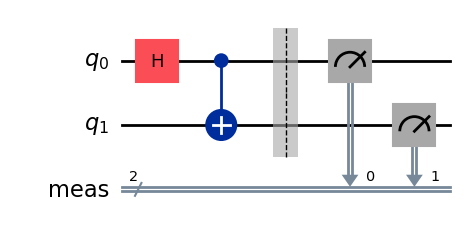

In [8]:
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")

In [9]:
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [10]:
backend = QasmSimulator()
trans = transpile(circuit, backend)

In [11]:
job = backend.run(trans, shots=1000)

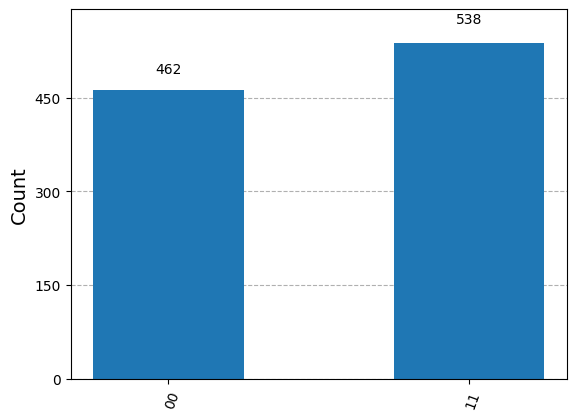

In [12]:
counts = job.result().get_counts()
plot_histogram(counts)